In [1]:
%%html
<style type="text/css">
@import url('https://fonts.googleapis.com/css?family=Playfair+Display');


div.text_cell_render {font-family: 'Playfair Display', geogia; color: #13213b; line-height: 145%; font-size:16px;}
</style>

In [1]:
%%html

<link rel="stylesheet"
          href="https://fonts.googleapis.com/css?family=Rancho&effect=shadow-multiple|3d-float">

<style type="text/css">
body {
  font-family: 'Rancho', serif;
  font-size: 16px;
  text-shadow: 2px 2px 2px #aaa;
}
</style>

Prelude
---

There are a few algorithms and method to forecast based on collected data. Forcasting future result based on historical data is unlike above: 1. first, we have to explore the relation among the data and result form historical samples, 2. after then, we have to predict data in the future, and forecast the result on the predicted samples by the rule.      

Method
---
1. In this problem, forcasting ETF's in the near future, features of data is divided two types: **a˚)** one changed (up or down) within certain range, such as ETF's Open, High, Low, and Close prices, and **b˚)** the other changed without no range, such as each date's deal volumes. The forth we use grey-box method to predict since the change of quantity varied continuousely;
and the latter  we use fbprophet.

2. After forcast completed, make cross-validation by machine learning algorithm, such ss random forest, Neural network methods etc.

3. As TBrain competition asked, we have to make forcast week after week. Thus proceed the following steps until the competition end:
   ```
   a˚) pre-train historic data;
   b˚) make forcast for next week;
   c˚) update the new real data of the next week data;
   d˚) repeate b and c.
   ```

References
---
1. [PyCon-2018-ua](../pycon-ua-2018-master/prophet.ipynb)
- [Stocker](Data-Analysis-master_stocker_fbprophetstocker) fbprophet on stock price prediction

Scheme
---
The methods of forecasting model include:
1. GM11(feature): Grey-box prediction for feature;
2. fb_forecast(df,period=7): fbprophet for df for future period;
3. Stock_forecast(df,period=7,cols=['Date','Open','High','Low','Close','Volume']): combined forcast method;
- df_result(df,code='0050'): generate dfwith more features required in the follows;


Prelude
---
To be convenient, the historic data had been prepared as a file in yahoo.update. Unzip the data and continuously process the future data with them. 

To update the new data, we implemented two methods in `fbprophet-introduction.ipynb` to do automatically:

- get_stock(id): get new data,
- df_update(): concatenate data for updated week data in `data1/%id%.csv` and historic data in `yahoo/20180424/%id%.csv`,
  where `%id` means the code of ETF and rename directory name of the download data from `yahoo/update` to `yahoo/20180424`. 

**Example1**

1. load data:

```
# yahoo/update/0050.csv
# df=pd_read_csv(...)

Date	date	Name	code	Open	High	Low	Close	Volume	year	month	day
1302	2018-04-27	20180427	元大台灣50	50	79.6	79.65	78.8	79.20	12396	2018	4	27
```

2. forcast: over the last historic samples

```
> size=30
> data1=df_0050[-size:].copy()
> data1.index=range(0,size)
> t=Stock_forecast(data1)

Date	Open	High	Low	Close	Volume
197	2018-03-29	82.25	82.35	81.80	82.10	4099.000000
198	2018-03-30	82.65	83.05	82.65	82.85	4994.000000
199	2018-03-31	82.85	83.05	82.75	82.95	878.000000
200	2018-04-01	83.24	83.58	82.91	83.26	1545.024651
201	2018-04-02	83.26	83.60	82.94	83.29	1193.709705
202	2018-04-03	83.29	83.63	82.97	83.32	960.099973
203	2018-04-04	83.32	83.66	82.99	83.34	822.543508
204	2018-04-05	83.34	83.69	83.02	83.37	750.177421
205	2018-04-06	83.37	83.71	83.05	83.40	715.089957
206	2018-04-07	83.40	83.74	83.07	83.42	694.231353
```

**Example2.** ETF forcast in standard format:

```
indeces=t2.Date[-5:]
columns = ['ETFid','Mon_ud','Mon_cprice','Tue_ud','Tue_cprice','Wed_ud','Wed_cprice',
           'Thu_ud','Thu_cprice','Fri_ud','Fri_cprice']

dfs= pd.DataFrame(columns=columns)
# Fill zero's rater than Nan 
dfs = dfs.fillna(0)

dfs.loc[0]=[t2.iloc[-5].code,t2.iloc[-5].sign,t2.iloc[-5].Close,
             t2.iloc[-4].sign,t2.iloc[-4].Close,t2.iloc[-3].sign,t2.iloc[-3].Close,
             t2.iloc[-2].sign,t2.iloc[-2].Close,t2.iloc[-1].sign,t2.iloc[-1].Close]
dfs

ETFid Mon_ud Mon_cprice Tue_ud Tue_cprice  ...
0050    1	   80.6      -1      80.46     ...
```

**Example3.** forcast all the ETF's

```
size=30

columns = ['ETFid','Mon_ud','Mon_cprice','Tue_ud','Tue_cprice','Wed_ud','Wed_cprice',
           'Thu_ud','Thu_cprice','Fri_ud','Fri_cprice']

dfs= pd.DataFrame(columns=columns)
# Fill zero's rater than Nan 
dfs = dfs.fillna(0)

i=0
for etf in  etfs:
    etf_name="yahoo/update/%s.csv" %etf
    df_0050=pd.read_csv(etf_name)

    data1=df_0050[-size:].copy()
    data1.index=range(0,size)
    t=Stock_forecast(data1)
    t2=df_result(t,code=etf)
    
    
    dfs.loc[i]=[t2.iloc[-5].code,t2.iloc[-5].sign,t2.iloc[-5].Close,
             t2.iloc[-4].sign,t2.iloc[-4].Close,
             t2.iloc[-3].sign,t2.iloc[-3].Close,
             t2.iloc[-2].sign,t2.iloc[-2].Close,
             t2.iloc[-1].sign,t2.iloc[-1].Close]
    print('Insert %s\'s prediction completed' %etf)
    i=i+1
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib
# load Lasso
from sklearn.linear_model import  Lasso ,MultiTaskElasticNet
# load NN functions
from keras.models import Sequential
from keras.layers.core import Dense, Activation

from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import IPython.core.display

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

In [3]:
inputfile = 'data/0050.csv'
df0050 = pd.read_csv(inputfile)

In [4]:
df0050.tail()

,代碼,日期,中文簡稱,開盤價(元),最高價(元),最低價(元),收盤價(元),total,Date,weekday
1281,50,20180327,元大台灣50,83.00,83.40,82.95,83.40,3277.0,2018-03-27,1
1282,50,20180328,元大台灣50,82.90,82.90,82.20,82.25,4161.0,2018-03-28,2
1283,50,20180329,元大台灣50,82.25,82.35,81.80,82.10,4099.0,2018-03-29,3
1284,50,20180330,元大台灣50,82.65,83.05,82.65,82.85,4994.0,2018-03-30,4
1285,50,20180331,元大台灣50,82.85,83.05,82.75,82.95,878.0,2018-03-31,5


In [5]:
df0050=df0050.rename(columns={"代碼": "code", "日期": "date",'中文簡稱':'Name',"開盤價(元)":'Open',
                            "最高價(元)":'High',"最低價(元)":'Low',"收盤價(元)":'Close',"total":"Volume"});

In [6]:
df0050_1=df0050[['Date','Open','High','Low','Close','Volume']]

GreyBox Method
---

With the excellent features, less data required, highly precision of short term predictions, Grey forcast box is sucessfully  introduced into several fields.  GM(1,1), one of building procedure of its model, is as follows:

1. $X^{(0)}=\left(x^{(0)}(j)\right)^{n}_{j=1}$ is the observed data, i.e. initial time series data,
```
 time   1       2       3       4   ... 
 
 X0   x0(1)   x0(2)   x0(3)   x0(4) ...

         ↓       ⇣       ⇣        ⇣
 X1   x1(1) → x1(1) → x1(3) → x1(4) ...
```
- the one-step accumulated time series, $X^{(1)}=\left(x^{(1)}(j)\right)^{n}_{j=1}$, where
$$ x^{(1)}(j)=\sum_{i=1}^jx^{(0)}(i), j=1,2,\cdots,n$$
- The differential equation of GM(1,1) corresponding to $X^{(1)}$, is defined as 
$$\frac{d X^{(1)}}{dt}+aX^{(1)} =u$$
with its (discretized) solution is 
$$\hat{x\!}^{(1)}(j+1)=\left( x^{(1)}(1)-\frac{\hat{u\!}}{\hat{a\!}}\right)
                      e^{-\hat {a\!}\ j}+\frac{\hat {u\!}}{\hat {a\!}}
$$
where ${\hat{a\!}},{\hat{u\!}}$ is the solution of discretized differentional equation by least square method.
- the forecasted data, $\hat{x\!}^{(0)}(j), j=1,\cdots,n$, could be calculated as follows:
\begin{eqnarray}
\hat{x\!}^{(0)}(j)&=&x^{(0)}_1,\\
\hat{x\!}^{(0)}(j+1)&=&\hat{x\!}^{(1)}(j+1)-\hat{x\!}^{(1)}(j)
   &=&\left(1-e^{a}\right)\left[x^{(0)}(1)-\frac{\hat{u\!}}{\hat{a\!}}\right]e^{-a \ j}
\end{eqnarray}
  

 **a).** solution of non-homogeneous differential equation, sum of general solution and special solution:
 \begin{eqnarray}
 X^{(1)}(t)&=&X^{(1)}_C(t)+X^{(1)}_p(t)\\
   (r+a)=0\to \color{red}{r=-a})        &=& C e^{\color{red}{-a} t}+\frac{1}{a+D}u\\ 
   &=&C e^{\color{red}{-a} t}+\frac{1}{a}\frac{1}{1+\frac{D}{a}}u\\
   &=&C e^{\color{red}{-a} t}+\frac{1}{a}\left(1-\frac{D}{a}+\cdots\right)u\\
   &=&C e^{\color{red}{-a} t}+\frac{u}{a}\\
X^{(1)}(0)=   C+\frac{u}{a}&\to&C=X^{(1)}(0)-\frac{u}{a}\\
X^{(1)}(t)&=&\left(X^{(1)}(0)-\frac{u}{a}\right)e^{\color{red}{-a} t}+\frac{u}{a}
 \end{eqnarray}
 
**b).**  Let $X_n=[x^{(0)}(2),\cdots,x^{(0)}(n)]$ and
$$B=\left[
    \begin{array}{cc}
    - \frac{x^{(1)}(2)+x^{(1)}(1)}{2}&1   \\
    \vdots&\vdots\\
    - \frac{x^{(1)}(n)+x^{(1)}(n-1)}{2}&1 
    \end{array}
    \right]_{(n-1)\times2}
$$
Then the least square estimate of $\left[{\hat{a\!}},{\hat{u\!}}\right]^T$ is $(B^TB)^{-1}B^TX_n$.
  - difference equation with respect to differential equation:
  \begin{eqnarray}
  x^{(1)}_k-x^{(1)}_{k-1}+az^{(1)}_k&=&u, \text{ }k=2,\cdots n\\
  x^{(0)}_k&=& u-az^{(1)}_k\\
   x^{(0)}_k&=&B_k [a, u]^T\\
   \Longrightarrow X_n&=&B[a, u]^T\\
   \left[{\hat{a\!}},{\hat{u\!}}\right]^T&=& (B^TB)^{-1}B^TX_n
  \end{eqnarray}
  Here, we use the average mean operation:
  $$z^{(1)}_k=\frac{x^{(1)}_k+x^{(1)}_{k-1}}{2}$$
  for $k=2,\cdots,n$.

posterior check
---
To conclude the goodness of fitting, the index of precision of predcition model, $1-\epsilon$, where $\epsilon$ is the residual, definded as follows:
$$\epsilon(j)=\left|\frac{{x\!}^{(0)}(j)-\hat{x\!}^{(0)}(j)}{{x\!}^{(0)}{(j)}}\right|$$
And the goodness is classified as 

\begin{array}[c|cccc]
\epsilon\quad \epsilon&\le0.1&(0.1,0.2]&(0.2,0.3]&\quad>0.3\\
\hline
\mathbf{\text{degree}}&\text{   good    }&\text{qualified}&\text{   just   }&\text{un-qualified}
\end{array}



Also the ratio of posterior S.E.'s, $C$, and probability of error, $P$, are defined as follows:
\begin{eqnarray}
C&=&\frac{\sqrt{\sum\limits_j( \epsilon(j)-\text{mean}( \epsilon))^2}}{\sqrt{\sum\limits_j( x^{(0)}(j)-\text{mean}( x^{(0)}))^2}}=\frac{S_1}{S_2}\\
P&=&\mathbb{P}\left(\left| \epsilon(j)-\bar{\epsilon}\right|\lt0.6745S_1 \right)
\end{eqnarray}


accuracy standard of posteriori errors
---
- C: ratio of standard deviation of prediction with respect to observed data,
- P: probability of normalized prediction data falling 1$\sigma$,

|$P$|$C$|degree of fittting|
|:---:|:---:|:---|
|$>0.95$|$<0.35$|good|
|$>0.80$|$<0.5$|qualified|
|$>0.70$|$<0.65$|just|
|$<0.70$|$>0.65$|un-qualified|




In [6]:
def GM11(x0):
  '''
  input
  x0: 
  6 outputs:
  f: x0
  a: coefficient of x in DE
  u: coefficient in nonhomogeneous term
  C: the ratio of posterior S.E.'s, 
  P: probability of error,  P 
  '''  
  x1 = x0.cumsum() #1-AGO sequence
  z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #（Neighbore-MEAN Sequence)
  z1 = z1.reshape((len(z1),1))
  B = np.append(-z1, np.ones_like(z1), axis = 1)
  Yn = x0[1:].reshape((len(x0)-1, 1))
  [[a],[u]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) # parameters
  f = lambda k: (x0[0]-u/a)*np.exp(-a*(k-1))-(x0[0]-u/a)*np.exp(-a*(k-2)) 
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  #return predict function, a b, first term, square-difference ratio、prob of small freqnencies  
  return f, a, u, x0[0], C, P 

In [7]:
outputfileCSV = '../tmp/data1_GM11.csv' 

#data = pd.read_csv(inputfile)
# 1286 record
data=df0050_1.copy()

In [161]:
V_mean=data['Volume'].mean()
V_std=data['Volume'].std()
data['VolumeLog']=np.log(data['Volume']+1)

In [283]:
data.tail(9)

,Date,Open,High,Low,Close,Volume
1277,2018-03-21,83.80,84.10,83.60,83.85,4891.0
1278,2018-03-22,84.00,84.60,83.45,83.55,3429.0
1279,2018-03-23,81.85,82.40,81.80,82.10,8259.0
1280,2018-03-26,81.85,82.20,81.60,82.20,4369.0
1281,2018-03-27,83.00,83.40,82.95,83.40,3277.0
1282,2018-03-28,82.90,82.90,82.20,82.25,4161.0
1283,2018-03-29,82.25,82.35,81.80,82.10,4099.0
1284,2018-03-30,82.65,83.05,82.65,82.85,4994.0
1285,2018-03-31,82.85,83.05,82.75,82.95,878.0


In [237]:
data[-1:]['Date'].values[0]

'2018-03-31'

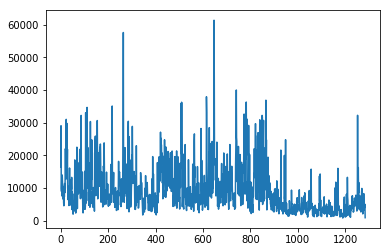

In [284]:
data['Volume'].plot()

In [248]:
tomorrow=str(pd.date_range(data[-1:]['Date'].values[0],periods=2)[-1])

In [281]:
def gen_future(df1, period=7):
    """
    generate the addional next week data with datetime and NON in other columns
    """
    data_size=len(df1)
    df=df1.copy()
    tomorrow=str(pd.date_range(df[-1:]['Date'].values[0],periods=2)[-1])
    for i in range(period):
        df.loc[data_size+i] = None
    print(df[-1:])
    
    df['Date'][-period:]=pd.date_range(tomorrow,periods=7)
    df['Date'][-period:]=df['Date'][-7:].dt.strftime("%Y-%m-%d")
    return df

In [278]:
data1=gen_future(data)

     Date  Open  High  Low  Close  Volume
1292  NaN   NaN   NaN  NaN    NaN     NaN


In [280]:
data1.tail(10)

,Date,Open,High,Low,Close,Volume
1283,2018-03-29,82.25,82.35,81.80,82.10,4099.0
1284,2018-03-30,82.65,83.05,82.65,82.85,4994.0
1285,2018-03-31,82.85,83.05,82.75,82.95,878.0
1286,2018-04-01,NaN,NaN,NaN,NaN,NaN
1287,2018-04-02,NaN,NaN,NaN,NaN,NaN
1288,2018-04-03,NaN,NaN,NaN,NaN,NaN
1289,2018-04-04,NaN,NaN,NaN,NaN,NaN
1290,2018-04-05,NaN,NaN,NaN,NaN,NaN
1291,2018-04-06,NaN,NaN,NaN,NaN,NaN
1292,2018-04-07,NaN,NaN,NaN,NaN,NaN


In [356]:
data_size=len(data)

period=7
for i in range(period):
    data.loc[data_size+i] = None

data['Date'][-period:]=pd.date_range(tomorrow,periods=7)
data['Date'][-period:]=data['Date'][-7:].dt.strftime("%Y-%m-%d")    

accuracy standard of posteriori errors
---
- *C*: ratio of standard deviation of prediction with respect to observed data,
- *P*: probability of normalized prediction data falling one $\sigma$,

|$P$|$C$|degree of fittting|
|:---:|:---:|:---|
|$>0.95$|$<0.35$|good|
|$>0.80$|$<0.5$|qualified|
|$>0.70$|$<0.65$|just|
|$<0.70$|$>0.65$|un-qualified|

In [358]:
l=['Open', 'High', 'Low', 'Close']

C=np.zeros([2,5])
P=np.zeros([2,5])
#print("    Variable   C   P")
print('{:13} {:6} {:6}'.format('Variable','C','P'))
for i in l:
  f = GM11(data[i][:data_size].as_matrix())[0]
  a = GM11(data[i][:data_size].as_matrix())[1]
  b = GM11(data[i][:data_size].as_matrix())[2]
  x00 = GM11(data[i][:data_size].as_matrix())[3]
  c = GM11(data[i][:data_size].as_matrix())[4]
  p = GM11(data[i][:data_size].as_matrix())[5]
  
  print('{:2} {:7} {:6.3f} {:6.3f}'.format("",i[:],c,p))
  #print("%s, %5.3f, %5.3f " %(i[:],c,p))
  #data[i][2014] = f(len(data)-1) # predict for 2014
  #data[i][2015] = f(len(data)) # predict for 2015年
  for j in range(7):
      ind=date_size+j  
      data[i][ind]= f(len(data)+j-6)
  data[i] = data[i].round(2) 

Variable      C      P     
   Open     0.226  0.983
   High     0.223  0.984
   Low      0.229  0.981
   Close    0.225  0.987


In [165]:
data['Volume']=np.expm1(data['VolumeLog'])

In [359]:
data.tail(10)

,Date,Open,High,Low,Close,Volume
1283,2018-03-29,82.25,82.35,81.80,82.10,4099.0
1284,2018-03-30,82.65,83.05,82.65,82.85,4994.0
1285,2018-03-31,82.85,83.05,82.75,82.95,878.0
1286,2018-04-01,80.65,80.98,80.32,80.69,NaN
1287,2018-04-02,80.69,81.01,80.36,80.73,NaN
1288,2018-04-03,80.72,81.05,80.39,80.76,NaN
1289,2018-04-04,80.76,81.08,80.43,80.80,NaN
1290,2018-04-05,80.79,81.12,80.46,80.83,NaN
1291,2018-04-06,80.83,81.15,80.50,80.87,NaN
1292,2018-04-07,80.86,81.19,80.53,80.90,NaN


In [30]:
outputfileCSV = 'tmp/data1_GM11.csv' 
data[l].to_csv(outputfileCSV) 

In [201]:
pd.date_range('4/1/2018', periods=7,format="%Y-%m%-d")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07'],
              dtype='datetime64[ns]', freq='D')

In [221]:
data['Date'][-7:]=pd.date_range('4/1/2018', periods=7,format="%Y-%m-%d")
data['Date'][-7:]=data['Date'][-7:].dt.strftime("%Y-%m-%d")

In [204]:
import time
data['Date'][-7:]=time.strftime("%Y-%m-%d")

In [222]:
data.tail(10)

,Date,Open,High,Low,Close,Volume
1283,2018-03-29,82.25,82.35,81.80,82.10,4099.0
1284,2018-03-30,82.65,83.05,82.65,82.85,4994.0
1285,2018-03-31,82.85,83.05,82.75,82.95,878.0
1286,2018-04-01,NaN,NaN,NaN,NaN,NaN
1287,2018-04-02,NaN,NaN,NaN,NaN,NaN
1288,2018-04-03,NaN,NaN,NaN,NaN,NaN
1289,2018-04-04,NaN,NaN,NaN,NaN,NaN
1290,2018-04-05,NaN,NaN,NaN,NaN,NaN
1291,2018-04-06,NaN,NaN,NaN,NaN,NaN
1292,2018-04-07,NaN,NaN,NaN,NaN,NaN


Function for Future Forecast
---

In [7]:
def fb_forecast(df,period=7):
    df1=df.copy()
    df1['y']=np.log(1+df1['y'])
    s={'changepoint_prior_scale':  0.05, 'weekly_seasonality' : False,
       'daily_seasonality': False,'monthly_seasonality': True,
       'yearly_seasonality': True,'changepoints': None}
    model = Prophet(daily_seasonality=s['daily_seasonality'],weekly_seasonality=s['weekly_seasonality'], 
                                  yearly_seasonality=s['yearly_seasonality'],
                                  changepoint_prior_scale=s['changepoint_prior_scale'],
                                  changepoints=s['changepoints'])
    model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
    model.fit(df1)
    future = model.make_future_dataframe(periods=period)
    forecast = model.predict(future)
    forecast_pred=forecast[-period:][['ds','yhat']]
    forecast_pred['yhat']=np.expm1(forecast_pred['yhat'])
    
    return forecast_pred

In [9]:
def Stock_forecast_p(df,period=7,cols=['Date','Open','High','Low','Close','Volume']):
    result=pd.DataFrame()
    #ttest=pd.DataFrame()
    #test=pd.DataFrame()
    df_1=df.copy()
    for col in cols[1:]:
        print('Precessing ',col,' ...')
        ttest=df_1[:][['Date',col]]
        ttest=ttest.rename(columns={'Date':'ds',col:'y'});
        test_0=fb_forecast(ttest,period=period)
        result[col]=test_0['yhat']
    result['Date']=test_0['ds']
    return result

There are no limit on the volume changes such that it could vary very fluctually. Unlike the case of Volume, the price of ETF's are limit to up or down 10% to the close quantity of last date. Thus the prediction on features concerned with price, are based on *grey-box* method and the prediction on volume feature based on *fbprophet*.   

In [8]:
def Stock_forecast(df,period=7,cols=['Date','Open','High','Low','Close','Volume']):
    dat=df[cols].copy()
    data_size=len(dat)
    tomorrow=str(pd.date_range(dat[-1:]['Date'].values[0],periods=2)[-1])
    for i in range(period):
          dat.loc[data_size+i] = None
    
    dat['Date'][-period:]=pd.date_range(tomorrow,periods=7)
    dat['Date'][-period:]=dat['Date'][-period:].dt.strftime("%Y-%m-%d")    
    
    
    l=['Open', 'High', 'Low', 'Close']
    
    for i in l:
        print('Precessing ',i,' (Grey Box) ...')
        f = GM11(dat[i][:data_size].as_matrix())[0]
        a = GM11(dat[i][:data_size].as_matrix())[1]
        b = GM11(dat[i][:data_size].as_matrix())[2]
        x00 = GM11(dat[i][:data_size].as_matrix())[3]
        c = GM11(dat[i][:data_size].as_matrix())[4]
        p = GM11(dat[i][:data_size].as_matrix())[5]
  

        for j in range(period):
            ind=data_size+j  
            dat[i][ind]= f(ind-(period-1))
        dat[i] = dat[i].round(2) 
    
    result=pd.DataFrame()
    #ttest=pd.DataFrame()
    #test=pd.DataFrame()
    df_1=df.copy()
    for col in cols[-1:]:
        print('Precessing ',col, ' (fbprophet)  ...')
        ttest=df_1[:][['Date',col]]
        ttest=ttest.rename(columns={'Date':'ds',col:'y'});
        test_0=fb_forecast(ttest,period=period)
        result[col]=test_0['yhat']
    
    dat[-period:]['Volume']=result[col]
    return dat

In [21]:
data1=data[-200:].copy()
data1.index=range(0,200)
t=Stock_forecast(data1)

Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...
Precessing  Volume  (fbprophet)  ...


In [22]:
t.tail(10)

,Date,Open,High,Low,Close,Volume
197,2018-03-29,82.25,82.35,81.80,82.10,4099.000000
198,2018-03-30,82.65,83.05,82.65,82.85,4994.000000
199,2018-03-31,82.85,83.05,82.75,82.95,878.000000
200,2018-04-01,83.24,83.58,82.91,83.26,1545.024651
201,2018-04-02,83.26,83.60,82.94,83.29,1193.709705
202,2018-04-03,83.29,83.63,82.97,83.32,960.099973
203,2018-04-04,83.32,83.66,82.99,83.34,822.543508
204,2018-04-05,83.34,83.69,83.02,83.37,750.177421
205,2018-04-06,83.37,83.71,83.05,83.40,715.089957
206,2018-04-07,83.40,83.74,83.07,83.42,694.231353


Test for Updated data
---

In [9]:
df_0050=pd.read_csv("yahoo/update/0050.csv")

In [30]:
size=30
data1=df_0050[-size:].copy()
data1.index=range(0,size)
t=Stock_forecast(data1)

Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...


In [32]:
t.tail(5)

,Date,Open,High,Low,Close,Volume
32,2018-04-30,80.86,81.00,80.30,80.60,7245.955216
33,2018-05-01,80.74,80.87,80.16,80.46,4977.962022
34,2018-05-02,80.61,80.73,80.02,80.32,5682.435386
35,2018-05-03,80.49,80.60,79.89,80.18,11971.658357
36,2018-05-04,80.37,80.46,79.75,80.04,33770.374895


In [68]:
def df_result(df,code='0050'):
    
    df_tmp=df.copy()
    
    # weekdys append
    df_tmp['Date']=pd.to_datetime(df_tmp['Date'])
    df_tmp['weekday']=pd.DatetimeIndex(df_tmp.Date).dayofweek.values
    
    # remove weekend
    df_tmp=df_tmp[df_tmp.weekday !=5]
    df_tmp=df_tmp[df_tmp.weekday !=6]
    
    df_tmp['code']=code
    
    df_tmp['yesterday_close'] = 0
    df_tmp['yesterday_volume'] = 0
       

    # get the values of yesterday's features by shift
    df_tmp['yesterday_close'][1:] = df_tmp['Close'][:-1]
    df_tmp['yesterday_volume'][1:] = df_tmp['Volume'][:-1]

    # new feature for price change
    df_tmp['price_change'] = df_tmp['Close'] - df_tmp['yesterday_close']

    # new feature for volumes change
    df_tmp['volume_Change'] = df_tmp['Volume'] - df_tmp['yesterday_volume']

    # new feature for deal sign, 1 for up, -1 for down and 0 for unchanged
    df_tmp['sign'] = np.sign(df_tmp['price_change']).astype('int')
    return df_tmp

In [69]:
t2=df_result(t,code='0050')

In [70]:
t2.tail(6)

,Date,Open,High,Low,Close,Volume,weekday,code,yesterday_close,yesterday_volume,price_change,volume_Change,sign
29,2018-04-27,79.60,79.65,78.80,79.20,12396.000000,4,0050,79.05,16486.000000,0.15,-4090.000000,1
32,2018-04-30,80.86,81.00,80.30,80.60,7245.955216,0,0050,79.20,12396.000000,1.40,-5150.044784,1
33,2018-05-01,80.74,80.87,80.16,80.46,4977.962022,1,0050,80.60,7245.955216,-0.14,-2267.993194,-1
34,2018-05-02,80.61,80.73,80.02,80.32,5682.435386,2,0050,80.46,4977.962022,-0.14,704.473364,-1
35,2018-05-03,80.49,80.60,79.89,80.18,11971.658357,3,0050,80.32,5682.435386,-0.14,6289.222971,-1
36,2018-05-04,80.37,80.46,79.75,80.04,33770.374895,4,0050,80.18,11971.658357,-0.14,21798.716538,-1


In [94]:
indeces=t2.Date[-5:]
columns = ['ETFid','Mon_ud','Mon_cprice','Tue_ud','Tue_cprice','Wed_ud','Wed_cprice',
           'Thu_ud','Thu_cprice','Fri_ud','Fri_cprice']

dfs= pd.DataFrame(columns=columns)
# Fill zero's rater than Nan 
dfs = dfs.fillna(0)

In [95]:
dfs.loc[0]=[t2.iloc[-5].code,t2.iloc[-5].sign,t2.iloc[-5].Close,
             t2.iloc[-4].sign,t2.iloc[-4].Close,
             t2.iloc[-3].sign,t2.iloc[-3].Close,
             t2.iloc[-2].sign,t2.iloc[-2].Close,
             t2.iloc[-1].sign,t2.iloc[-1].Close]

In [96]:
dfs

,ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice
0,0050,1,80.6,-1,80.46,-1,80.32,-1,80.18,-1,80.04


Final Output
---


In [97]:
etfs=['0050','0051','0052','0053','0054','0055','0056','0057','0058',
      '0059','006201','006203','006204','006208','00690','00692','00701','00713']


In [98]:
# Fortune varies from minute to minute, try to predict the next week from data of last 30 days 
size=30

columns = ['ETFid','Mon_ud','Mon_cprice','Tue_ud','Tue_cprice','Wed_ud','Wed_cprice',
           'Thu_ud','Thu_cprice','Fri_ud','Fri_cprice']

dfs= pd.DataFrame(columns=columns)
# Fill zero's rater than Nan 
dfs = dfs.fillna(0)

i=0
for etf in  etfs:
    etf_name="yahoo/update/%s.csv" %etf
    df_0050=pd.read_csv(etf_name)

    data1=df_0050[-size:].copy()
    data1.index=range(0,size)
    t=Stock_forecast(data1)
    t2=df_result(t,code=etf)
    
    
    dfs.loc[i]=[t2.iloc[-5].code,t2.iloc[-5].sign,t2.iloc[-5].Close,
             t2.iloc[-4].sign,t2.iloc[-4].Close,
             t2.iloc[-3].sign,t2.iloc[-3].Close,
             t2.iloc[-2].sign,t2.iloc[-2].Close,
             t2.iloc[-1].sign,t2.iloc[-1].Close]
    print('Insert %s\'s prediction completed' %etf)
    i=i+1

Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Close  (Grey Box) ...
Precessing  Volume  (fbprophet)  ...
Insert 0050's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0051's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Close  (Grey Box) ...
Precessing  Volume  (fbprophet)  ...
Insert 0052's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...
Precessing  Volume  (fbprophet)  ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Insert 0053's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0054's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0055's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0056's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0057's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0058's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 0059's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 006201's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 006203's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 006204's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 006208's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 00690's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 00692's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Close  (Grey Box) ...
Precessing  Volume  (fbprophet)  ...
Insert 00701's prediction completed
Precessing  Open  (Grey Box) ...
Precessing  High  (Grey Box) ...
Precessing  Low  (Grey Box) ...
Precessing  Close  (Grey Box) ...


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Precessing  Volume  (fbprophet)  ...
Insert 00713's prediction completed


In [99]:
dfs

,ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice
0,0050,1,80.60,-1,80.46,-1,80.32,-1,80.18,-1,80.04
1,0051,1,32.62,1,32.63,1,32.64,1,32.65,1,32.66
2,0052,1,55.05,-1,54.93,-1,54.81,-1,54.69,-1,54.57
3,0053,1,35.24,-1,35.16,-1,35.07,-1,34.99,-1,34.90
4,0054,1,23.55,-1,23.52,-1,23.49,-1,23.46,-1,23.43
5,0055,-1,16.89,1,16.90,1,16.91,0,16.91,1,16.92
6,0056,1,25.62,-1,25.59,-1,25.57,-1,25.54,-1,25.52
7,0057,1,50.00,-1,49.94,-1,49.87,-1,49.80,-1,49.74
8,0058,1,45.88,-1,45.86,-1,45.83,-1,45.81,-1,45.79
9,0059,-1,41.65,0,41.65,1,41.66,0,41.66,0,41.66


In [100]:
!mkdir result

In [102]:
dfs.to_csv("result/week1.csv",index=None)